In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


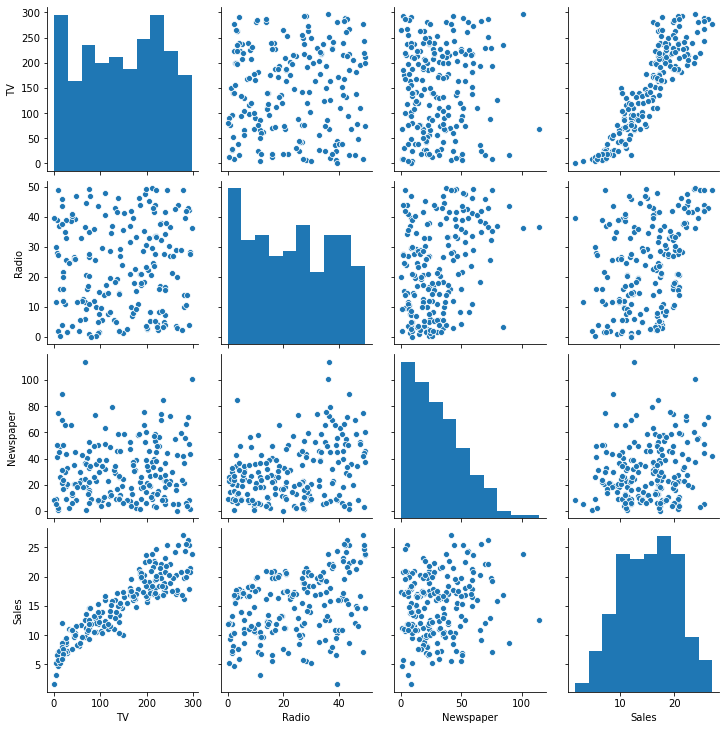

In [6]:
sns.pairplot(df)

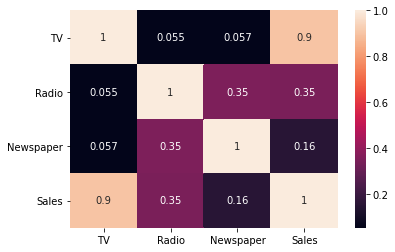

In [8]:
sns.heatmap(df.corr(), annot=True)

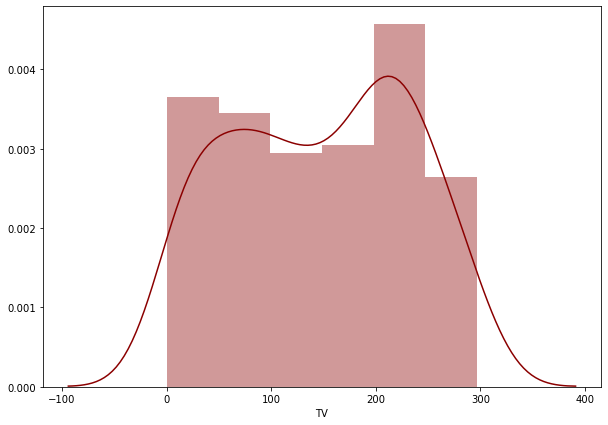

In [19]:
plt.figure(figsize=(10,7))
sns.distplot(df['TV'],color='darkred')

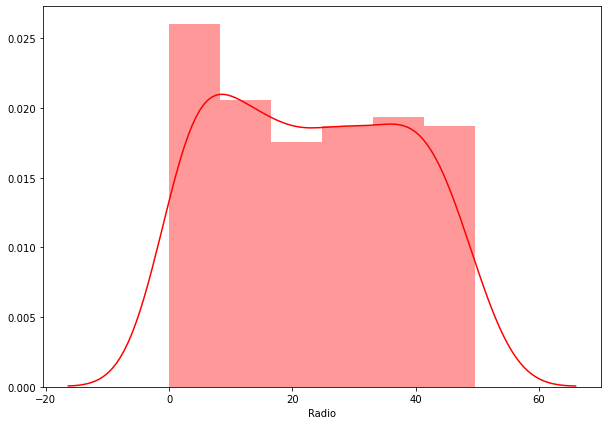

In [20]:
plt.figure(figsize=(10,7))
sns.distplot(df['Radio'],color='red')

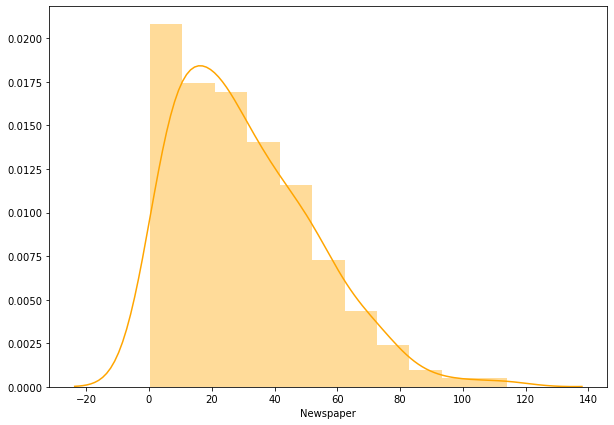

In [21]:
plt.figure(figsize=(10,7))
sns.distplot(df['Newspaper'],color='orange')

In [22]:
from sklearn.model_selection import train_test_split

X=df.drop('Sales',axis=1)
y=df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=18)

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()

lr.fit(rescaledX_train,y_train)

LinearRegression()

In [25]:
lr.score(rescaledX_train,y_train)

0.9069192467762237

In [26]:
lr.fit(rescaledX_test,y_test)
lr.score(rescaledX_test,y_test)

0.910033844970092

In [46]:
def prediction(lr, TV=0.5, Radio=0.6, Newspaper=0.7):
  x = np.array([TV, Radio, Newspaper]).reshape(1, 3)
  print('The number of sales is :', lr.predict(x))

In [47]:
prediction(lr)

The number of sales is : [17.52498191]
